### Practical Application III: Comparing Classifiers

Overview: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. We will utilize a dataset related to marketing bank products over the telephone.

Getting Started

Our dataset comes from the UCI Machine Learning repository link. 
The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.
We will make use of the article accompanying the dataset here for more information on the data and features.

Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the Materials and Methods section of the paper. How many marketing campaigns does this data represent?

This dataset represents 17 campaigns.

From Moro and Laureano "The dataset collected is related to 17 campaignsthat occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored and if there was sucess (the target variable). For the whole database considered, there were 6499 successes (8% success rate)"

In [2]:
# import all the necessary libraries from pandas, sklearn, and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn import set_config
set_config(display="diagram")
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# 1. Read in the bank-additional-full.csv file
df = pd.read_csv('/Users/kaushikr/Documents/Berkeley Data Folder/DataSets_starter/bank-additional-full.csv', sep = ';')

In [4]:
# make sure to see all the columns
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# 2. Investigate the dataset for missing or problematic data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:>

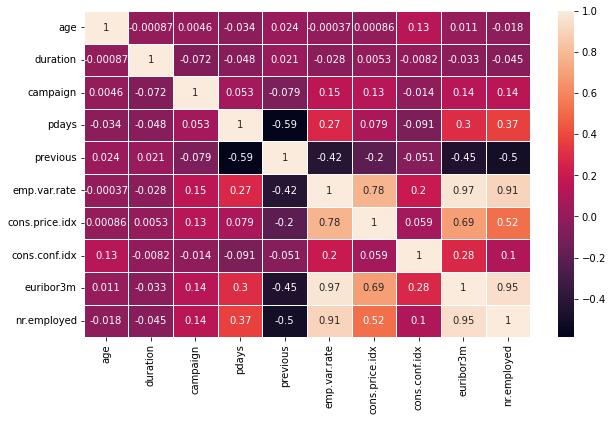

In [6]:
#The dataset do not seem to contain any null values

# Doing a heatmap to check if there are any correlations with the numerical data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidth=1)

In [7]:
# Dataset has 9 categorical values and rest numerical values. 
# High correlation exist between 
# cons.price.idx and emp.var.rate, 
# euribor3m and emp.var.rate, 
# nr.employed and emp.var.rate
# euribor3m and cons.price.idx, 
# nr.employed and cons.price.idx
# euribor3m and nr.employed

Text(0, 0.5, 'Count of Bank Customers')

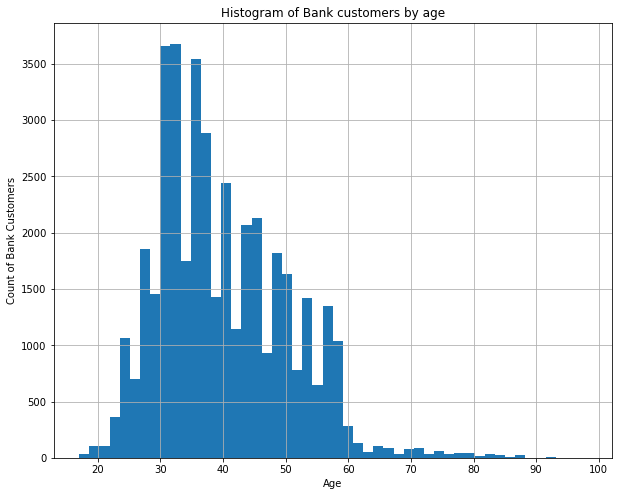

In [7]:
# Plotting the histogram distribution of bank customers by age. 
plt.figure(figsize=(10,8))
df["age"].hist(bins=50)
plt.title('Histogram of Bank customers by age')
plt.xlabel('Age')
plt.ylabel('Count of Bank Customers')

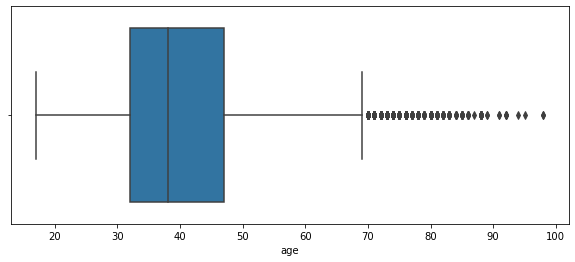

In [8]:
# Above histogram shows normal distribution by age with outliers below 20 and above age 60

# To get the exact range and outliers - doing a box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'])
plt.show()

# Shows range between 30-50 years

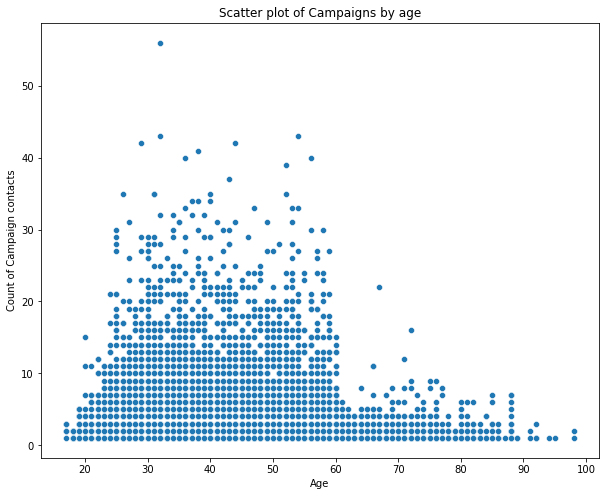

In [9]:
# Scatter plot of number of campaigns by age. 
plt.figure(figsize=(10,8))
plt.title('Scatter plot of Campaigns by age')
plt.xlabel('Age')
plt.ylabel('Count of Campaign contacts')
sns.scatterplot(x="age", y="campaign", data=df)
plt.show()

# Highest number of campaign contacts seem to have happened to customers age 20 to 60

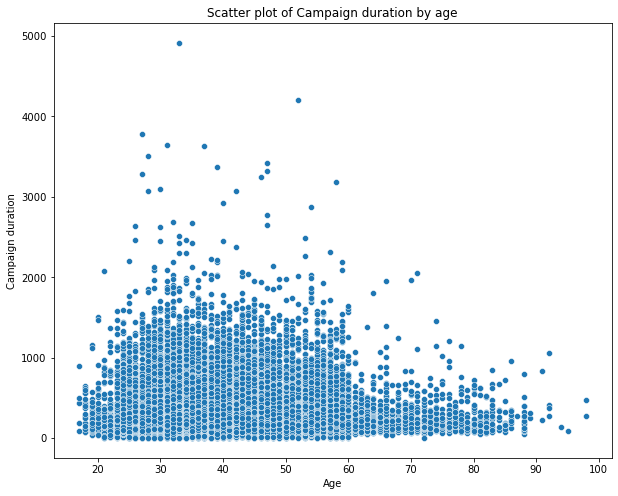

In [11]:
# Scatter plot of campaign duration by age. 
plt.figure(figsize=(10,8))
plt.title('Scatter plot of Campaign duration by age')
plt.xlabel('Age')
plt.ylabel('Campaign duration')
sns.scatterplot(x="age", y="duration", data=df)
plt.show()

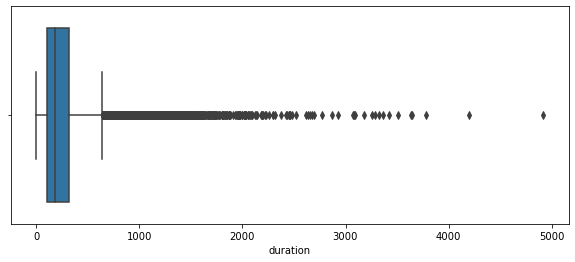

In [10]:
# To get the exact range and outliers - doing a box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration'])
plt.show()

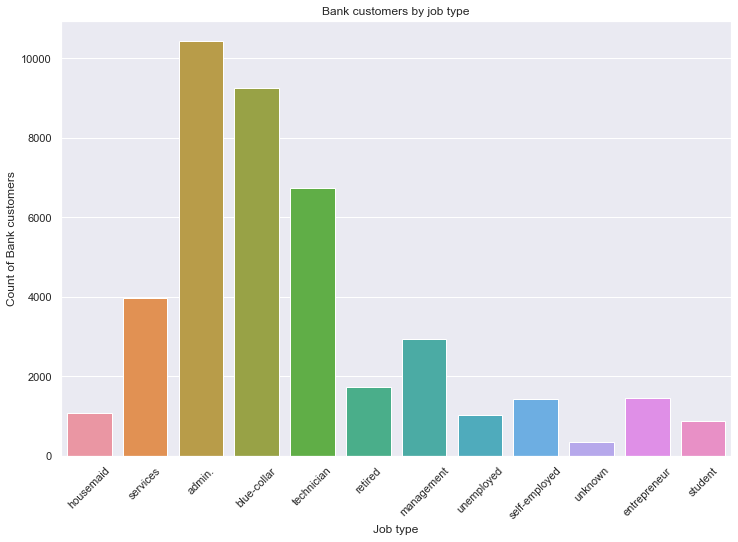

In [11]:
# Histogram of bank customers by job type. 
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(x="job", data=df)
plt.xticks(rotation=45);
plt.xlabel("Job type")
plt.ylabel("Count of Bank customers")
plt.title("Bank customers by job type")
plt.show(fig)

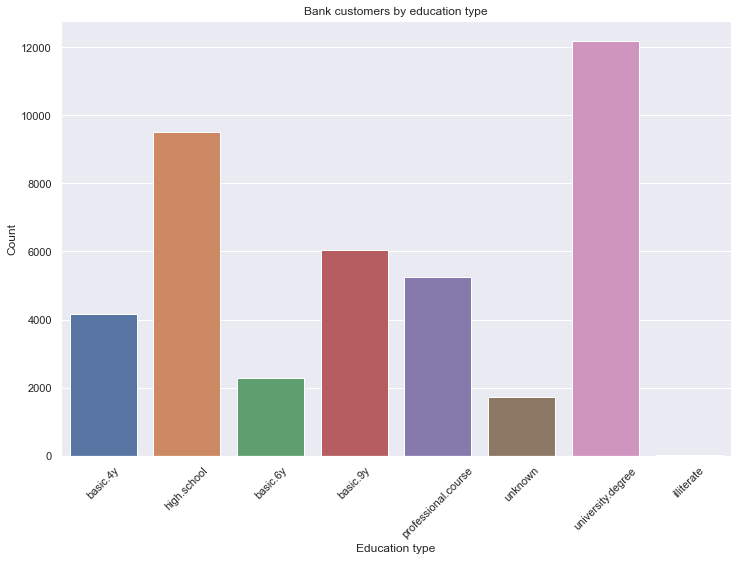

In [12]:
# Histogram of bank customers by education. 
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(x="education", data=df)
plt.xticks(rotation=45);
plt.xlabel("Education type")
plt.ylabel("Count")
plt.title("Bank customers by education type")
plt.show(fig)

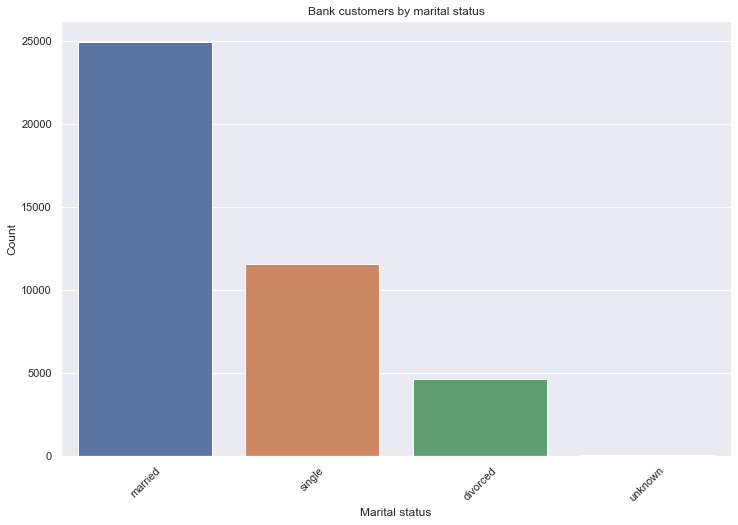

In [15]:
# Histogram of bank customers by marital status. 
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(x="marital", data=df)
plt.xticks(rotation=45);
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Bank customers by marital status")
plt.show(fig)

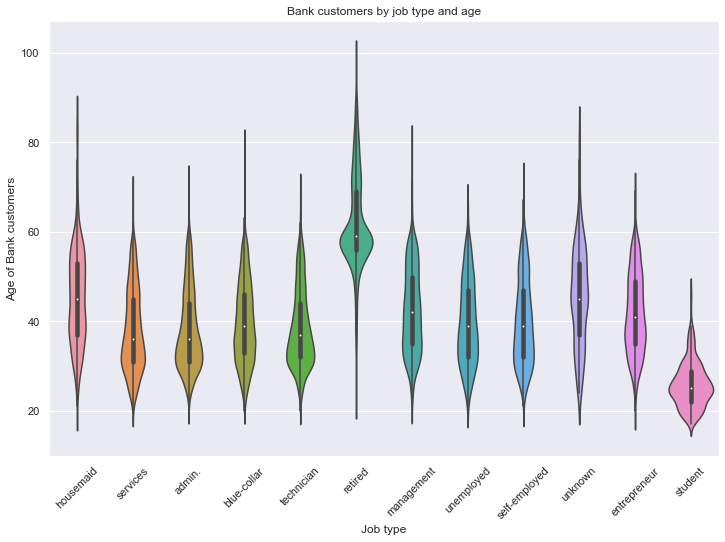

In [13]:
sns.violinplot(data=df, x="job", y="age")
plt.xticks(rotation=45);
plt.xlabel("Job type")
plt.ylabel("Age of Bank customers")
plt.title("Bank customers by job type and age")
plt.show(fig)

# Most professional types are within age range 20-60, except for retire which are 50 and above and 
# students who are 10 to 40 years 

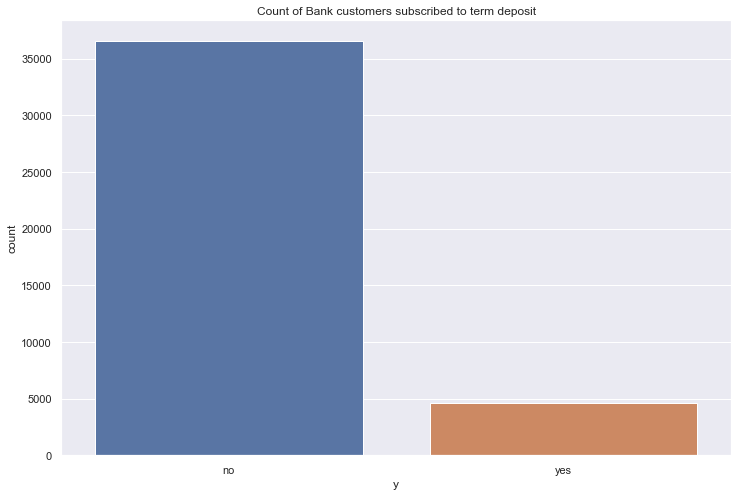

In [14]:
sns.countplot(data=df, x = 'y')
plt.title('Count of Bank customers subscribed to term deposit');
# Extremely unbalanced out classes, may need to use stratify or shuffle during data splitiing

# Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the Business Objective of the task. 
State the objective below.

Direct marketing campaign may or may not be effective (as we see in this case just 8% success rate). Hence, 
the objective of the task is to come up with best predictive model to target customers who are have greater likelihood to subscribe to term deposits.

# Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started. Before we can do this, we must work to encode the data. Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
#remove outliers
bank_cust_model=df[(df['age']>20) & (df['age']<60) ]

In [16]:
#create smaller dataset with just few features 
bank_cust_model=bank_cust_model[['age','job','marital','education','default','housing','loan','y']]

In [17]:
bank_cust_model
bank_cust_model.shape

(39855, 8)

In [18]:
# Transferring the categorical fields using ordinal and one hot encoder. Standard scaler used to pass the numerical
#fields
number_cols = ['age'] 
ordinal_cols =  ['education'] 
ohe_cols = ['job','marital', 'default', 'housing', 'loan']

In [19]:
bank_cust_model['education'].unique()


array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [20]:
X = bank_cust_model.drop('y', axis = 1)
y = bank_cust_model['y']

one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),
(OrdinalEncoder(categories = [['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']]), ordinal_cols),
                                             
                                          remainder=StandardScaler())

In [21]:
bank_cust_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39855 entries, 0 to 41186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39855 non-null  int64 
 1   job        39855 non-null  object
 2   marital    39855 non-null  object
 3   education  39855 non-null  object
 4   default    39855 non-null  object
 5   housing    39855 non-null  object
 6   loan       39855 non-null  object
 7   y          39855 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


# Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
# Splitting the data using 70:30 ratio using stratify to reduce sampling error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,stratify = bank_cust_model.y)



# Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline. What is the baseline performance that our classifier should aim to beat?

In [23]:
y_test.value_counts(normalize = True)

no     0.89688
yes    0.10312
Name: y, dtype: float64

In [27]:
# The baseline seems to be around 89.5%

# Problem 8: A Simple Model

In [28]:
# Use Logistic Regression to build a basic model on your data

In [24]:
%%time
model_lr = Pipeline([('transformer', one_hot_encoder),('logreg', LogisticRegression(max_iter=10000))])
model_lr.fit(X_train, y_train)
y_predict_train = model_lr.predict(X_train)
y_predict_test = model_lr.predict(X_test)

CPU times: user 480 ms, sys: 13.4 ms, total: 494 ms
Wall time: 499 ms


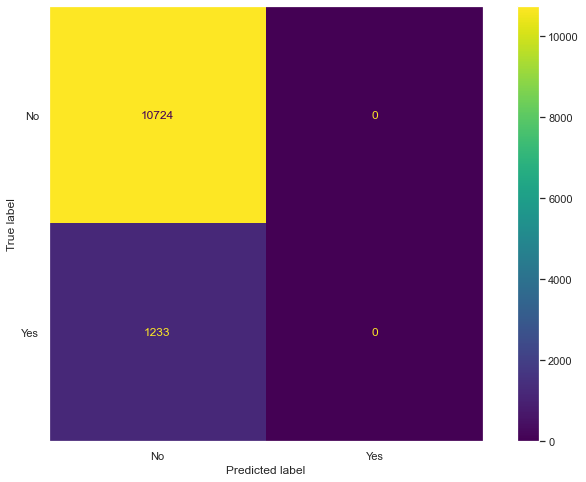

In [25]:
conf_mat  = confusion_matrix(y_test, y_predict_test)
disp_label = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels = ['No', 'Yes'])
disp_label.plot()
plt.grid(False)
plt.show()

In [ ]:
# The confusion matrix does not predict any customer or set of customers who are willing to subscribe

# Problem 9: Score the model

In [40]:
#What is the accuracy of the model ?

In [26]:
train_logreg = accuracy_score(y_train, y_predict_train)
test_logreg = accuracy_score(y_test, y_predict_test)

print("Train Accuracy:",train_logreg)
print("Test Accuracy:", test_logreg)

Train Accuracy: 0.8968384830453796
Test Accuracy: 0.896880488416827


In [43]:
# It seems the logisctic regression model is giving a high accuracy of nearly 89.6 %

# Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models. Present your findings in a DataFrame similar to that below:

Model	Train Time	Train Accuracy	Test Accuracy

### KNN

In [36]:
%%time
model_knn = Pipeline([('transformer', one_hot_encoder),
     ('KNeighbors', KNeighborsClassifier())])
model_knn.fit(X_train, y_train)
y_predict_train = model_knn.predict(X_train)
y_predict_test = model_knn.predict(X_test)

CPU times: user 40.9 s, sys: 9.47 s, total: 50.3 s
Wall time: 50.6 s


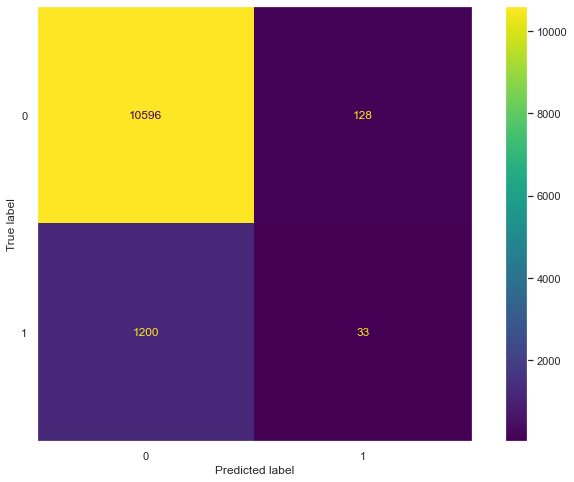

In [28]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [40]:
# Similar to logistic regression model, the KNN confusion matrix does not predict any customer or set of customers 
# who are willing to subscribe

In [37]:
train_knn = accuracy_score(y_train, y_predict_train)
test_knn = accuracy_score(y_test, y_predict_test)

print("Train Accuracy:",train_knn)
print("Test Accuracy:", test_knn )

Train Accuracy: 0.8976270700408632
Test Accuracy: 0.888935351676842


In [41]:
# Similar to logisctic regression, KNN model is giving a high accuracy of nearly 88.9 %

### Decision Tree

In [30]:
%%time
model_dt = Pipeline([('transformer', one_hot_encoder),
     ('dt', DecisionTreeClassifier())])
model_dt.fit(X_train, y_train)
y_predict_train = model_dt.predict(X_train)
y_predict_test = model_dt.predict(X_test)

CPU times: user 576 ms, sys: 14 ms, total: 590 ms
Wall time: 598 ms


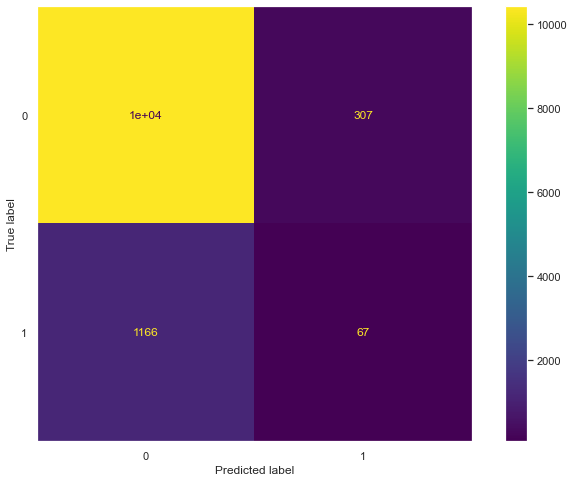

In [31]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [44]:
# Similar to previous models, the DT confusion matrix does not predict any customer or set of customers 
# who are willing to subscribe

In [32]:
dt_train = accuracy_score(y_train, y_predict_train)
dt_test = accuracy_score(y_test, y_predict_test)

print("Test Accuracy:", dt_train)
print("Test Accuracy:", dt_test)

Test Accuracy: 0.918918918918919
Test Accuracy: 0.8768085640210755


### SVM

In [33]:
%%time
model_svm = Pipeline([('transformer', one_hot_encoder),
     ('dt', SVC( kernel= 'rbf'))])
model_svm.fit(X_train, y_train)
y_predict_train = model_svm.predict(X_train)
y_predict_test = model_svm.predict(X_test)

CPU times: user 33.7 s, sys: 339 ms, total: 34.1 s
Wall time: 34.3 s


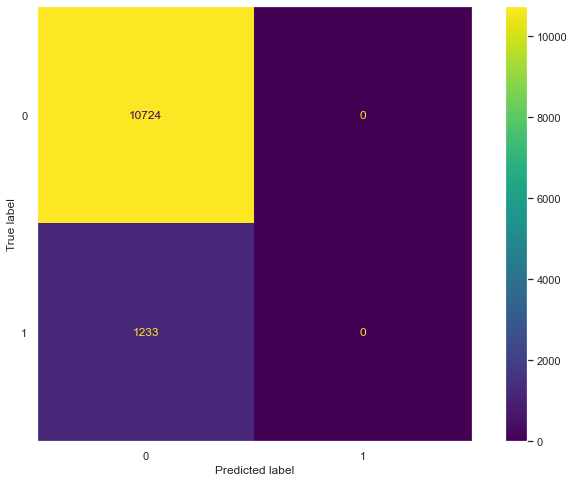

In [34]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [35]:
svm_train = accuracy_score(y_train, y_predict_train)
svm_test = accuracy_score(y_test, y_predict_test)

print("Train Accuracy", svm_train)
print("Test Accuracy:", svm_test)

Train Accuracy 0.8968384830453796
Test Accuracy: 0.896880488416827


In [38]:
from tabulate import tabulate
model_table = [['Logistic Regression', '0.5s', '89.6%', '89.6%'],
['KNN', '50.6s', '89.7%', '87.7%'],
['Decison Tree', '0.6s', '91.8%', '87.6%'],
['SVM', '34.3', '89.6%', '89.6%']]
print (tabulate(model_table, headers=["Model", "Train Time", "Train Accuracy", "Test Accuracy"]))

Model                Train Time    Train Accuracy    Test Accuracy
-------------------  ------------  ----------------  ---------------
Logistic Regression  0.5s          89.6%             89.6%
KNN                  50.6s         89.7%             87.7%
Decison Tree         0.6s          91.8%             87.6%
SVM                  34.3          89.6%             89.6%


In [50]:
#The decision tree seems to give best accuracy at 91.8% with both decision tree and logistic regression having similar 
# train time. The other models also have comparable accuracies. 

# Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.

More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
Adjust your performance metric

In [51]:
#analyzing the original dataset and removing outliers and features that may not be helpful

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
#Per our earlier EDA, age range 20 to 60 is where maximum contact was established, hence removing outliers.

In [40]:
df_new = df[(df['age']>20) & (df['age']<60)]

In [41]:
#further call duration can be limited to <500
df_new=df[(df['duration']<500) ]

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36235 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36235 non-null  int64  
 1   job             36235 non-null  object 
 2   marital         36235 non-null  object 
 3   education       36235 non-null  object 
 4   default         36235 non-null  object 
 5   housing         36235 non-null  object 
 6   loan            36235 non-null  object 
 7   contact         36235 non-null  object 
 8   month           36235 non-null  object 
 9   day_of_week     36235 non-null  object 
 10  duration        36235 non-null  int64  
 11  campaign        36235 non-null  int64  
 12  pdays           36235 non-null  int64  
 13  previous        36235 non-null  int64  
 14  poutcome        36235 non-null  object 
 15  emp.var.rate    36235 non-null  float64
 16  cons.price.idx  36235 non-null  float64
 17  cons.conf.idx   36235 non-null 

In [43]:
number_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
ordinal_cols =  ['education','month','day_of_week'] 
ohe_cols = ['marital', 'default', 'housing', 'loan','contact','poutcome','job']

In [44]:
X = df_new.drop('y', axis = 1)
y = df_new['y']

In [45]:
ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ohe_cols),
          (OrdinalEncoder(),ordinal_cols) ,                                  
                                          remainder=StandardScaler())

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [47]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6555,46,blue-collar,married,basic.4y,no,no,no,telephone,may,wed,89,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
35467,50,housemaid,married,basic.9y,no,yes,no,cellular,may,mon,16,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
34522,42,admin.,married,high.school,no,yes,no,cellular,may,thu,160,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
13332,37,entrepreneur,divorced,university.degree,no,yes,no,cellular,jul,wed,224,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
9474,32,housemaid,single,basic.4y,no,yes,yes,telephone,jun,mon,123,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1


### Logistic Regression with Hyperparameters

In [48]:
lgr_params = {'lgr__penalty': ['l1', 'l2'],'lgr__C': np.logspace(-3,3,7),'lgr__solver'  : ['liblinear']},

lgr_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
    ('lgr', LogisticRegression(class_weight='balanced',max_iter=10000))
])

lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring='roc_auc',cv=5)
print(lgr_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'lgr', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'lgr__C', 'lgr__class_weight', 'lgr__dual', 'lgr__fit_intercept', 'lgr__intercept_scaling', 'lgr__l1_ratio', 'lgr__max_iter', 'lgr__multi_class', 'lgr__n_jobs', 'lgr__penalty', 'lgr__ra

In [49]:
%%time
lgr_grid.fit(X_train, y_train)

CPU times: user 2min 18s, sys: 2.72 s, total: 2min 21s
Wall time: 1min 13s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('lgr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             param_grid=({'lgr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'lgr__penalty': ['l1', 'l2'],
                          'lgr__solver': ['liblinear']},),
             scoring='roc_auc')

In [50]:
print(lgr_grid.best_params_)

{'lgr__C': 1.0, 'lgr__penalty': 'l1', 'lgr__solver': 'liblinear'}


In [51]:
y_predict_train = lgr_grid.predict(X_train)
y_predict_test = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)
print('Score - ROCAUC:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('Score - Train Accuracy:', accuracy_score(y_train, y_predict_train))
print('Score - Test Accuracy:', accuracy_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

Score - ROCAUC: 0.9477422686284007
Score - Train Accuracy: 0.872575303579877
Score - Test Accuracy: 0.871216999356085
              precision    recall  f1-score   support

          No       0.99      0.87      0.93     10084
         Yes       0.35      0.89      0.50       787

    accuracy                           0.87     10871
   macro avg       0.67      0.88      0.71     10871
weighted avg       0.94      0.87      0.90     10871



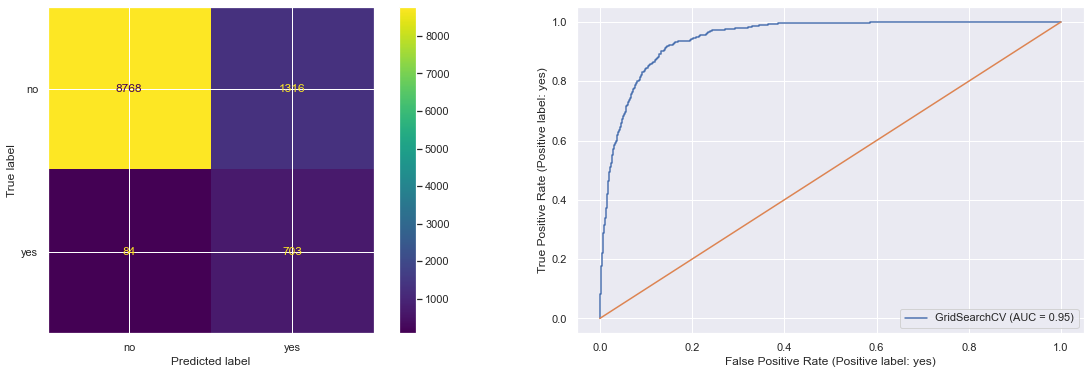

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

### KNN with Gridsearch CV

In [53]:
knn_params = {'knn__n_neighbors': range(1, 15, 1)},

knn_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
    ('knn', KNeighborsClassifier())
])

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, scoring='roc_auc',cv=5)
print(knn_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'knn', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])


In [54]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 3min 28s, sys: 49.3 s, total: 4min 18s
Wall time: 2min 20s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=({'knn__n_neighbors': range(1, 15)},),
             scoring='roc_auc')

In [55]:
y_predict_train = knn_grid.predict(X_train)
y_predict_test = knn_grid.predict(X_test)
y_hat_probs = knn_grid.predict_proba(X_test)
print('KNN - ROCAUC:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('KNN - Train Accuracy:', accuracy_score(y_train, y_predict_train))
print('KNN - Test Accuracy:', accuracy_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

KNN - ROCAUC: 0.9220844146778244
KNN - Train Accuracy: 0.9484702728276297
KNN - Test Accuracy: 0.9407598197037991
              precision    recall  f1-score   support

          No       0.95      0.99      0.97     10084
         Yes       0.68      0.34      0.46       787

    accuracy                           0.94     10871
   macro avg       0.82      0.66      0.71     10871
weighted avg       0.93      0.94      0.93     10871



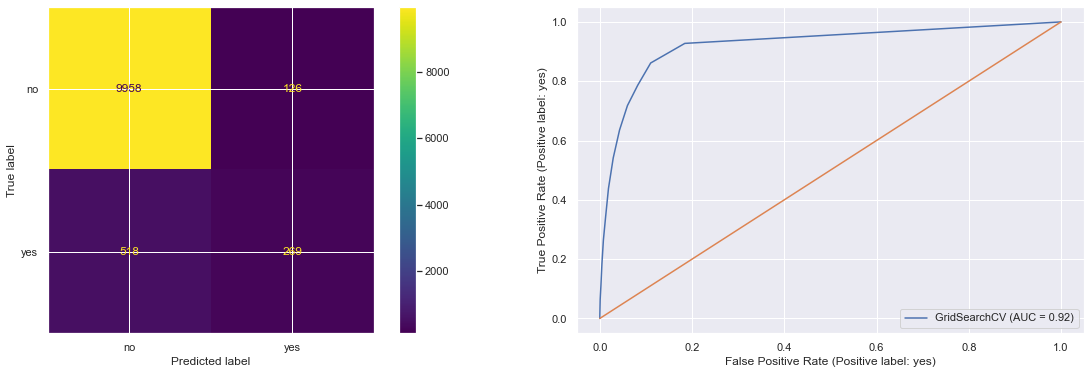

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

### Decision Trees with Gridsearchcv

In [57]:
dt_params = {'dt__max_depth': range(1,7),
         'dt__min_samples_split': [.1,.2,.3,.05],
          'dt__criterion': ['gini','entropy'],
          'dt__min_samples_leaf': [1,2,3,4,5]
         }

dt_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
    ('dt', DecisionTreeClassifier(random_state = 42))
])

dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params, scoring='roc_auc',cv=5)
print(dt_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'dt', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_samples_leaf', 'dt__min_samples_spl

In [58]:
%%time
dt_grid.fit(X_train, y_train)

CPU times: user 2min 39s, sys: 11.3 s, total: 2min 51s
Wall time: 2min 52s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(1, 7),
                         'dt__min_samples_leaf': [1, 2, 3, 4, 5],
                         'dt__min_samples_split': [0.1, 0.2, 0.3, 0.05]},
             scoring='roc_auc')

In [59]:
print(dt_grid.best_params_)

{'dt__criterion': 'entropy', 'dt__max_depth': 6, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 0.05}


In [60]:
y_predict_train = dt_grid.predict(X_train)
y_predict_test = dt_grid.predict(X_test)
y_hat_probs = dt_grid.predict_proba(X_test)
print('DT - ROCAUC score:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('DT - Train Accuracy score:', accuracy_score(y_train, y_predict_train))
print('DT - Test Accuracy score:', accuracy_score(y_test, y_predict_test))
# print('F1 score:',f1_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

DT - ROCAUC score: 0.9452740562502426
DT - Train Accuracy score: 0.9470115123797508
DT - Test Accuracy score: 0.9456351761567473
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     10084
         Yes       0.68      0.47      0.55       787

    accuracy                           0.95     10871
   macro avg       0.82      0.72      0.76     10871
weighted avg       0.94      0.95      0.94     10871



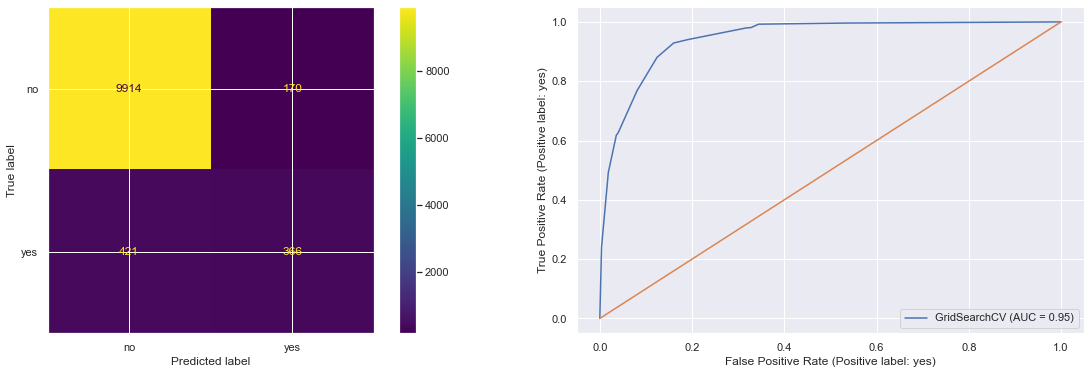

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [63]:
from tabulate import tabulate
model_table2 = [['Logistic Regression', '1min 13s', '94.7%','87.2%', '87.1%'],
['KNN', '2min 21s','92.2%', '94.8%', '94%'],
['Decison Tree', '2min 52s','94.5%' ,'94.7%', '94.5%']]
print (tabulate(model_table2, headers=["Model", "Train Time", "ROCAC", "Train Accuracy", "Test Accuracy"]))

Model                Train Time    ROCAC    Train Accuracy    Test Accuracy
-------------------  ------------  -------  ----------------  ---------------
Logistic Regression  1min 13s      94.7%    87.2%             87.1%
KNN                  2min 21s      92.2%    94.8%             94%
Decison Tree         2min 52s      94.5%    94.7%             94.5%


In [77]:
#after hyperparameter tuning, Logistic Regression and Decision Trees have highest ROCAC scores but logistic regression
#took lesser time  than Decision Tree (with 6 depth).